In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# =============== Plots for the mass-spring-damper system =========

AttributeError: module 'numpy' has no attribute 'range'

In [26]:
def system(Y,t):
    settling_time = 2;
    w_n = 4/(settling_time); 
    b = 2*w_n;
    m = 1;
    F = 2;
    k = np.power(w_n,2);
    y1, y2 = Y;
    return [y2, F -(b/m)*y2 - (k/m)*y1]

(-4, 4)

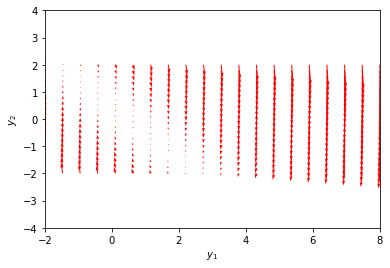

In [24]:
# Phase portraits 
y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = system([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

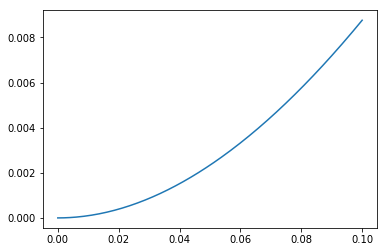

In [34]:
# Solutions
U0 = [0,0]
xs = np.linspace(0,0.1,200);
Us = odeint(system, U0, xs);
ys = Us[:,0]

plt.plot(xs,ys)

In [87]:
def MassSpringDamper(state,t):
    q = state[0];
    q_dot = state[1];

    #system variables
    k = 4;
    b = 0.4;
#     F = 2;

    q_ddot =  - b * q_dot - k * q;
    return[q_dot, q_ddot]


def EnergyFun(state, t):
    q = state[0];
    q_dot = state[1];
    b = 0.4;
    
    v_dot = -b * q_dot * q_dot;
    return [0,v_dot]

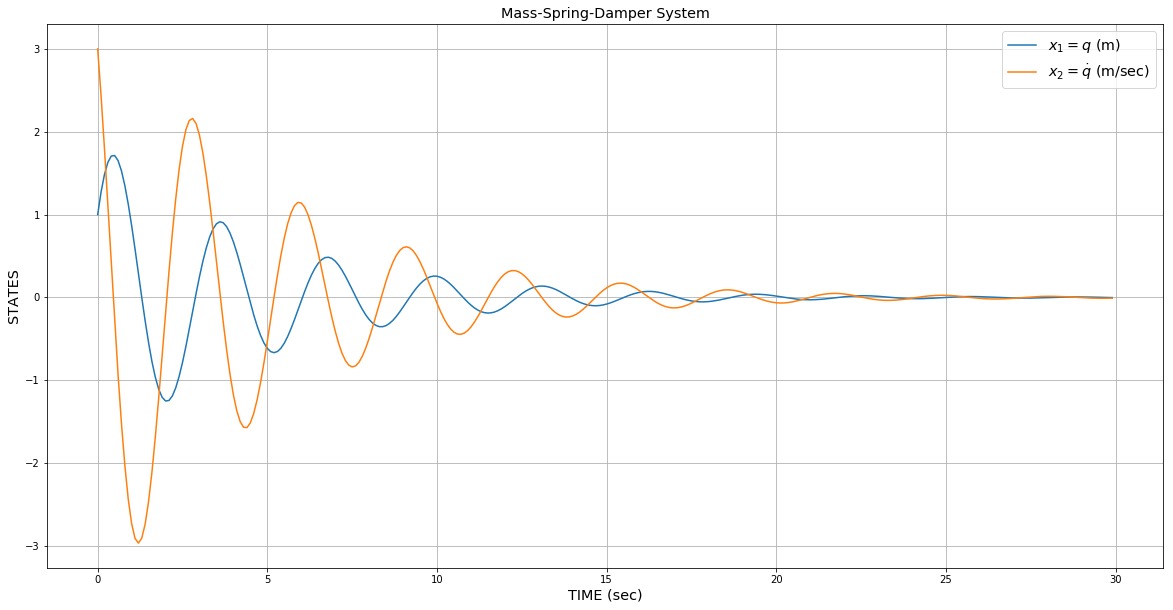

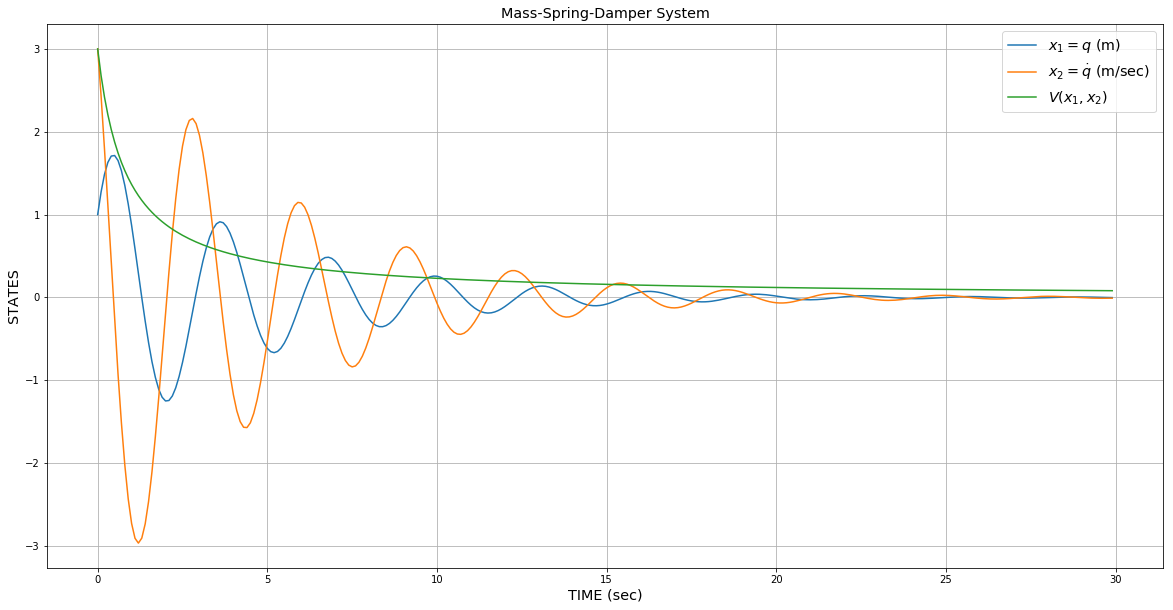

In [89]:
t = np.arange(0.0, 30.0, 0.1);
state0 = [1.0,3.0]
states = odeint(MassSpringDamper,state0,t);
energy = odeint(EnergyFun, state0, t)

plt.figure(figsize = (20,10))
plt.plot(t,states)
plt.xlabel('TIME (sec)', fontsize = "x-large")
plt.ylabel('STATES', fontsize = "x-large")
plt.title('Mass-Spring-Damper System', fontsize = "x-large")
plt.legend(('$x_1 = q$ (m)', '$x_2 = \dot{q}$ (m/sec)'), fontsize = "x-large")
plt.grid()
plt.savefig('/home/igmitsio/Dropbox/axam/RL lecture/presentation/images/msd.png', bbox_inches='tight')

plt.figure(figsize = (30,10))
plt.plot(t,states)
plt.hold
plt.plot(t,energy[:,1])
plt.xlabel('TIME (sec)', fontsize = "x-large")
plt.ylabel('STATES', fontsize = "x-large")
plt.title('Mass-Spring-Damper System', fontsize = "x-large")
plt.legend(('$x_1 = q$ (m)', '$x_2 = \dot{q}$ (m/sec)', '$V(x_1, x_2)$'), fontsize = "x-large")
plt.grid()
plt.savefig('/home/igmitsio/Dropbox/axam/RL lecture/presentation/images/msdEN.png', bbox_inches='tight')


